In [1]:
library(tidyverse)
library(lubridate)


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




Rows: 280 Columns: 725

-- Column specification --------------------------------------------------------
Delimiter: ","
chr   (2): Province/State, Country/Region
dbl (723): Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, ...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.



tibble [141,316 x 4] (S3: tbl_df/tbl/data.frame)
 $ country_region: chr [1:141316] "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ date          : Date[1:141316], format: "2020-01-22" "2020-01-22" ...
 $ confirmed_n   : num [1:141316] 0 0 0 0 0 0 0 0 0 0 ...
 $ new_cases_n   : num [1:141316] 0 0 0 0 0 0 0 0 0 0 ...


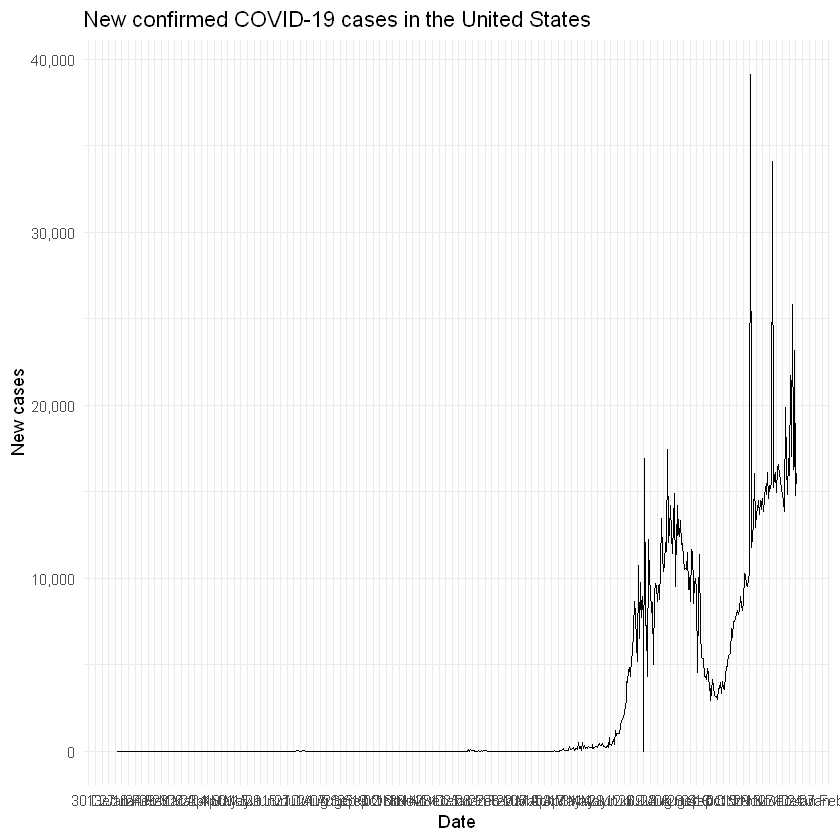

In [67]:
theme_set(theme_minimal())
#remove x in date
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid19_confirmed <- read_csv(url)
#get 200 day 

covid19_confirmed <- covid19_confirmed %>%
  pivot_longer(-c(`Province/State`, `Country/Region`, Lat, Long),
               names_to = "date",
               values_to = "confirmed_n") %>%
  
  select(-c(Lat, Long)) %>%
  
  rename(
    province_state = `Province/State`,
    country_region = `Country/Region`) %>%
  
  mutate(date = mdy(date)) %>%
  group_by(country_region, date) %>%
  summarise(confirmed_n = sum(confirmed_n)) %>%
  ungroup()
covid19_confirmed <- covid19_confirmed %>%
  arrange(date) %>%
  group_by(country_region) %>%
  mutate(new_cases_n = confirmed_n - lag(confirmed_n, default = 0)) %>%
  ungroup()
covid19_confirmed %>%
  filter(country_region == "Vietnam") %>%
  ggplot(aes(x = date, y = new_cases_n)) +
  geom_line() +
  scale_x_date(date_breaks = "2 weeks", date_labels = "%d %b") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    x = "Date", y = "New cases",
    title = "New confirmed COVID-19 cases in the United States")
str(covid19_confirmed)

In [71]:
vn <- covid19_confirmed %>%
  filter(country_region == "Vietnam")
head(vn)

country_region,date,confirmed_n,new_cases_n
<chr>,<date>,<dbl>,<dbl>
Vietnam,2020-01-22,0,0
Vietnam,2020-01-23,2,2
Vietnam,2020-01-24,2,0
Vietnam,2020-01-25,2,0
Vietnam,2020-01-26,2,0
Vietnam,2020-01-27,2,0


In [64]:
covid19 %>%
  filter(country_region == "US") %>%
  ggplot(aes(x = date, y = new_cases_n)) +
  geom_line() +
  scale_x_date(date_breaks = "2 weeks", date_labels = "%d %b") +
  scale_y_continuous(labels = scales::comma) +
  labs(
    x = "Date", y = "New cases",
    title = "New confirmed COVID-19 cases in the United States")  

Warning message in if (i == "Vietnam") {:
"the condition has length > 1 and only the first element will be used"


In [28]:
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", header=T)
data$date <- as.Date(data$date)

In [29]:
data

date,value
<date>,<dbl>
2013-04-28,135.98
2013-04-29,147.49
2013-04-30,146.93
2013-05-01,139.89
2013-05-02,125.60
2013-05-03,108.13
2013-05-04,115.00
2013-05-05,118.80
2013-05-06,124.66
